**Logistic Regression**

**1. What is Logistic Regression, and how does it differ from Linear Regression?**

Logistic Regression is a classification algorithm that predicts discrete outcomes. Linear Regression is used for predicting continuous
values. Logistic Regression uses the sigmoid function to produce probabilities.


**2. What is the mathematical equation of Logistic Regression?**

P(y=1|x) = 1 / (1 + e^-( + x + ... + x))


**3. Why do we use the Sigmoid function in Logistic Regression?**

It transforms linear outputs into probabilities (0 to 1), enabling binary classification.


**4. What is the cost function of Logistic Regression?**

J() = -1/m [y log(h(x)) + (1 - y) log(1 - h(x))]


**5. What is Regularization in Logistic Regression? Why is it needed?**

It penalizes large coefficients to reduce overfitting. L1 (Lasso) and L2 (Ridge) add penalties to the cost function.


**6. Explain the difference between Lasso, Ridge, and Elastic Net regression.**

Lasso (L1) can shrink some coefficients to zero (feature selection). Ridge (L2) shrinks coefficients but retains all. Elastic Net
combines both.


**7. When should we use Elastic Net instead of Lasso or Ridge?**

Use when features are correlated and you want both shrinkage and feature selection.


**8. What is the impact of the regularization parameter ( or C)?**

High (low C): more regularization. Low (high C): less regularization, potential overfitting.


**9. What are the key assumptions of Logistic Regression?**

Linearity in log-odds, no multicollinearity, independent observations, large sample size.


**10. What are some alternatives to Logistic Regression for classification tasks?**

Decision Trees, Random Forest, SVM, KNN, Gradient Boosting, Neural Networks.


**11. What are Classification Evaluation Metrics?**
Accuracy, Precision, Recall, F1 Score, ROC-AUC, Confusion Matrix, Log Loss.


**12. How does class imbalance affect Logistic Regression?**

Bias toward majority class. Solutions: class weights, resampling, use F1/ROC-AUC.


**13. What is Hyperparameter Tuning in Logistic Regression?**

Adjusting parameters like C, penalty type, and solver using GridSearchCV or RandomizedSearchCV.


**14. What are different solvers in Logistic Regression? Which one should be used?**

liblinear (small data, L1/L2), saga (large data, all penalties), lbfgs & newton-cg (L2, multiclass).


**15. How is Logistic Regression extended for multiclass classification?**

Using One-vs-Rest (OvR) or Softmax (multinomial logistic regression).
Logistic Regression Cheat Sheet

**16. What are the advantages and disadvantages of Logistic Regression?**

Advantages: simple, interpretable, fast. Disadvantages: assumes linearity, poor on complex relationships.


**17. What are some use cases of Logistic Regression?**

Spam detection, disease diagnosis, credit scoring, churn prediction, fraud detection.


**18. What is the difference between Softmax Regression and Logistic Regression?**

Logistic: binary classification. Softmax: multiclass, outputs
probabilities for each class.


**19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**

Softmax: exclusive classes, probability for each. OvR: simpler, works for overlapping classes.

**20. How do we interpret coefficients in Logistic Regression?**

Each coefficient reflects change in log-odds. exp() gives the odds ratio (>1: positive impact, <1: negative)

**Practical**

In [136]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.
from sklearn.datasets import load_iris
df=load_iris()
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)





0.9666666666666667

In [137]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

from sklearn.datasets import load_iris
df=load_iris()
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)




1.0

In [138]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression (penalty='12'). Print model accuracy and coefficients.

from sklearn.datasets import load_iris
df=load_iris()
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
print('Model Accuracy',accuracy_score(y_test,y_pred))
for k in range(len(df.feature_names)):
  print(df.feature_names[k],model.coef_[0][k])


Model Accuracy 1.0
sepal length (cm) 0.3711229016795454
sepal width (cm) 1.4097119970148466
petal length (cm) -2.1521011684465843
petal width (cm) -0.9547417876562494


In [139]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').
from sklearn.datasets import load_iris
df=load_iris()
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='elasticnet', solver='saga',  l1_ratio=0.5, C=1.0, random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1.0

In [140]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.
from sklearn.datasets import load_iris
df=load_iris()
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9666666666666667

In [141]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer()
x=df.data
y=df.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', max_iter=1000)

from sklearn.model_selection import GridSearchCV
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
# Grid search
grid = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

from sklearn.metrics import accuracy_score
y_pred = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Accuracy on Test Set: {accuracy:.4f}")


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Accuracy on Test Set: 0.9912


In [142]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracу.
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_breast_cancer

df=load_breast_cancer()

x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

kf = StratifiedKFold(n_splits=5,)

from sklearn.model_selection import cross_val_score
acc=cross_val_score(model,x,y,cv=kf)
print(acc)
print(np.mean(acc))




[0.92982456 0.93859649 0.97368421 0.94736842 0.96460177]
0.9508150908244062


In [143]:
# TO SAVE THE CSV FILE

import pandas as pd


# Create a sample DataFrame
data = {
    'Age': [22, 35, 47, 52, 23, 30, 60, 48],
    'EstimatedSalary': [20000, 35000, 50000, 60000, 22000, 40000, 70000, 48000],
    'Purchased': [0, 1, 1, 1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

# Save it as CSV
df.to_csv('social_network_ads.csv', index=False)
print("Sample CSV created successfully.")

Sample CSV created successfully.


In [144]:
# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its  accuracу.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('social_network_ads.csv')  # Replace with your filename

print(df.head())

# Step 2: Select Features and Target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")




   Age  EstimatedSalary  Purchased
0   22            20000          0
1   35            35000          1
2   47            50000          1
3   52            60000          1
4   23            22000          0
Accuracy: 0.5000


In [145]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracу.


from sklearn.datasets import load_breast_cancer
df=load_breast_cancer()
x=df.data
y=df.target



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', max_iter=1000)

from sklearn.model_selection import GridSearchCV
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
# Grid search
grid = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

from sklearn.metrics import accuracy_score
y_pred = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Accuracy on Test Set: {accuracy:.4f}")


Best Parameters: {'C': 100, 'penalty': 'l1'}
Best Accuracy on Test Set: 0.9825


In [146]:
# 10. Write a Python program to implement One-vs-One (Ovo) Multiclass Logistic Regression and print accuracy.
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import load_iris
df=load_iris()
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression
model = OneVsOneClassifier(LogisticRegression())

model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



1.0

[[77 13]
 [15 95]]


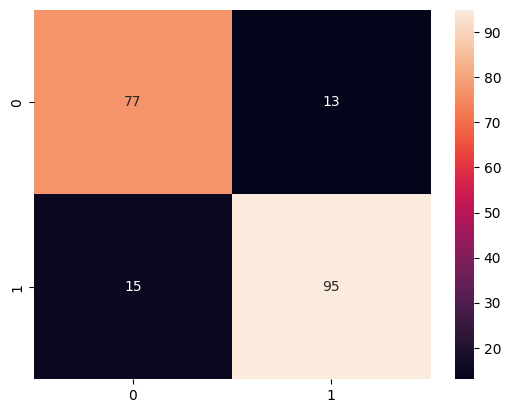

In [147]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True)
plt.show()


In [148]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and Fl-Score.

from sklearn.datasets import load_iris
df=load_iris()
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

#evaluate its performance using Precision, Recall, and Fl-Score.
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-Score (macro):", f1)

Precision (macro): 0.9523809523809524
Recall (macro): 0.9743589743589745
F1-Score (macro): 0.9610256410256411


In [162]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


X, y = make_classification(n_samples=1000, n_features=10, n_informative=6,
                           n_redundant=2, n_clusters_per_class=1, weights=[0.9, 0.1],
                           flip_y=0, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_no_weights = LogisticRegression()
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

print("Classification Report WITHOUT class weights:")
print(classification_report(y_test, y_pred_no_weights))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_no_weights))

# Train model with class weights to handle imbalance
model_with_weights = LogisticRegression(class_weight='balanced')
model_with_weights.fit(X_train, y_train)
y_pred_weights = model_with_weights.predict(X_test)

print("\nClassification Report WITH class weights:")
print(classification_report(y_test, y_pred_weights))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_weights))



Classification Report WITHOUT class weights:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       183
           1       0.94      0.88      0.91        17

    accuracy                           0.98       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.98      0.98      0.98       200

Confusion Matrix:
[[182   1]
 [  2  15]]

Classification Report WITH class weights:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       183
           1       0.68      0.88      0.77        17

    accuracy                           0.95       200
   macro avg       0.84      0.92      0.87       200
weighted avg       0.96      0.95      0.96       200

Confusion Matrix:
[[176   7]
 [  2  15]]


In [150]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score
from sklearn.preprocessing import LabelEncoder

df = sns.load_dataset('titanic')
df.head()

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
target = 'survived'
df = df[features + [target]]

df['age']=df['age'].fillna(df.age.mean())
df['sex'] = LabelEncoder().fit_transform(df['sex'])

X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy)
print(r2)
print(precision)
print(recall)
print(f1)




0.8100558659217877
0.2167310167310167
0.803030303030303
0.7162162162162162
0.7571428571428571


In [151]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df=load_iris()
x=df.data
y=df.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

  # with Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled= scaler.transform(x_test)

model=LogisticRegression()
model.fit(X_train_scaled , y_train)
y_pred=model.predict(X_test_scaled)
acc=accuracy_score(y_test,y_pred)
print("accuracy with Scaling :  ", acc)


# without Standardization
model=LogisticRegression()
model.fit(x_train, y_train)
y_preds=model.predict(x_test)

acc=accuracy_score(y_test,y_preds)
print("accuracy without Scaling :  ", acc)



accuracy with Scaling :   0.9666666666666667
accuracy without Scaling :   0.9666666666666667


In [152]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

model=LogisticRegression()
model.fit(x_train, y_train)
y_preds=model.predict(x_test)


roc_auc=roc_auc_score(y_test,y_preds)
print('roc_auc_score ',roc_auc)





roc_auc_score  0.8595959595959598


In [153]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracу.
from sklearn.datasets import load_iris
df=load_iris()
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)




0.9666666666666667

In [154]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model (one-vs-rest by default)
model = LogisticRegression()
model.fit(X_train, y_train)

# Get model coefficients
coefficients = model.coef_  # shape: [n_classes, n_features]

coeff_df = pd.DataFrame(coefficients.T, index=feature_names, columns=target_names)

print("Feature Importance (Model Coefficients):")
print(coeff_df)



Feature Importance (Model Coefficients):
                     setosa  versicolor  virginica
sepal length (cm) -0.393456    0.508433  -0.114977
sepal width (cm)   0.962518   -0.254827  -0.707691
petal length (cm) -2.375124   -0.213011   2.588136
petal width (cm)  -0.998746   -0.775748   1.774494


In [155]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen's Kappa Score.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate with Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)

# Print result
print("Cohen's Kappa Score:",kappa)


Cohen's Kappa Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


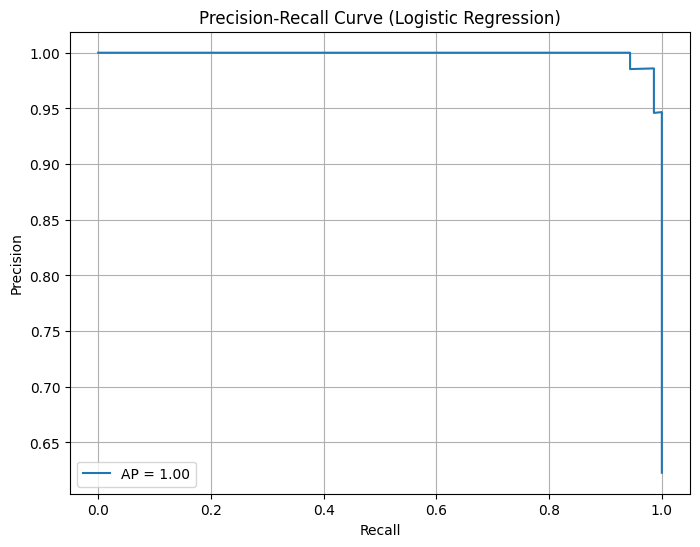

In [156]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target  # Binary: 0 (malignant), 1 (benign)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict probabilities for positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()



In [157]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, Ibfgs) and compare their accuracy.

# Import required libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']
accuracies = {}

# Train and evaluate Logistic Regression with each solver
for solver in solvers:

        model = LogisticRegression(solver=solver, max_iter=200)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies[solver] = acc


# Print accuracy for each solver
print("Solver Comparison:")
for solver, acc in accuracies.items():
    print(f"{solver}: {acc}")



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver Comparison:
liblinear: 1.0
saga: 1.0
lbfgs: 1.0


In [158]:
# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
coef=matthews_corrcoef(y_pred,y_test)
print('matthews_corrcoef',coef)


matthews_corrcoef 1.0


In [159]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# raw dATA
model_raw = LogisticRegression()
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

#on Standardized Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)


print("Accuracy on Raw Data        :", acc_raw)
print("Accuracy on Standardized Data:",acc_scaled  )



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Raw Data        : 0.956140350877193
Accuracy on Standardized Data: 0.9736842105263158


In [160]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()

#  parameter grid for C (regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform cross-validation using GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_C = grid_search.best_params_['C']

# Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best C value from cross-validation:", best_C)
print("Test set accuracy with best C     :", round(accuracy, 4))



Best C value from cross-validation: 1
Test set accuracy with best C     : 0.9825


In [161]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

# Import libraries
import joblib
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Save model to a file
joblib.dump(model, 'logistic_model.joblib')
print("Model saved as 'logistic_model.joblib'")

# Load model from file
loaded_model = joblib.load('logistic_model.joblib')
print("Model loaded successfully.")

# Predict using loaded model
sample = X_test[0].reshape(1, -1)
predicted_class = loaded_model.predict(sample)[0]
print(f"Predicted class for sample: {predicted_class} ({iris.target_names[predicted_class]})")



Model saved as 'logistic_model.joblib'
Model loaded successfully.
Predicted class for sample: 1 (versicolor)
